# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [ ]:
 # Подгрузим пакеты
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи

<ipython-input-3-cba842aab3d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(A)
<ipython-input-3-cba842aab3d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(B)


<Axes: ylabel='Density'>

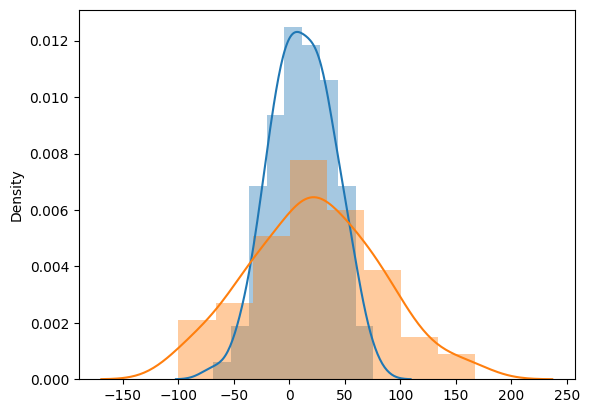

In [ ]:
sns.distplot(A)
sns.distplot(B)

In [ ]:
alpha = 0.05 # level of relevance
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

result = ttest_ind(A,B)
pv = result.pvalue
print('P-value = %8f'% pv)

if pv < alpha:
  print('Wrong hypothesis')
else:
  print('Accept hypothesis')


P-value = 0.084510
Accept hypothesis


Ответ: слишком большая разница. Разница больше 5%. На графике так же видны значительные различия.

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

In [ ]:
import pandas as pd
import numpy as np

ar = np.array([water, nutri, mineral])
columns = ['water', 'nutri', 'mineral']
df =pd.DataFrame([water, nutri, mineral], columns).T
# В массиве water одно значение NAN. Необходимо заменить на среднее.
df['water'] = df['water'].fillna(df['water'].mean())

df

<ipython-input-6-76d41bc93926>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.array([water, nutri, mineral])


,water,nutri,mineral
0,1.00,1.0,2.0
1,2.00,2.0,1.0
2,3.00,4.0,1.0
3,4.00,6.0,3.0
4,2.00,5.0,2.0
5,4.00,6.0,4.0
6,2.00,7.0,2.0
7,4.00,5.0,4.0
8,5.00,4.0,5.0
9,2.00,5.0,4.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7e40a0d99db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e40a0d9a2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e40a0d99b10>,
 'medians': [<matplotlib.lines.Line2D at 0x7e40a0d9a830>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e40a0d9aad0>,
 'means': []}

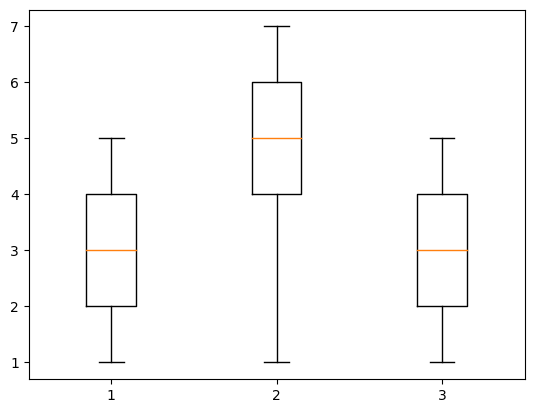

In [ ]:
plt.boxplot(df)

In [ ]:
fvalue, pvalue = stats.f_oneway(df['water'], df['mineral'],df['nutri'])

print('Fval=%.3f, Pvalue =%.6f ' %(fvalue, pvalue))

if pvalue >0.05:
  print('zero hypothesis is wrong. avg are the same')
else:
  print ('zero hypothesis is wright. avg are different')

Fval=12.835, Pvalue =0.000023 
zero hypothesis is wright. avg are different


Ответ: Результат дисперионного анализа (ANOVA) показывает, что средние значения одинаковые. Но на боксплотах видно, что  среднее у удобрений больше.

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

<ipython-input-9-e392f90565af>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос.

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции.

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [ ]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


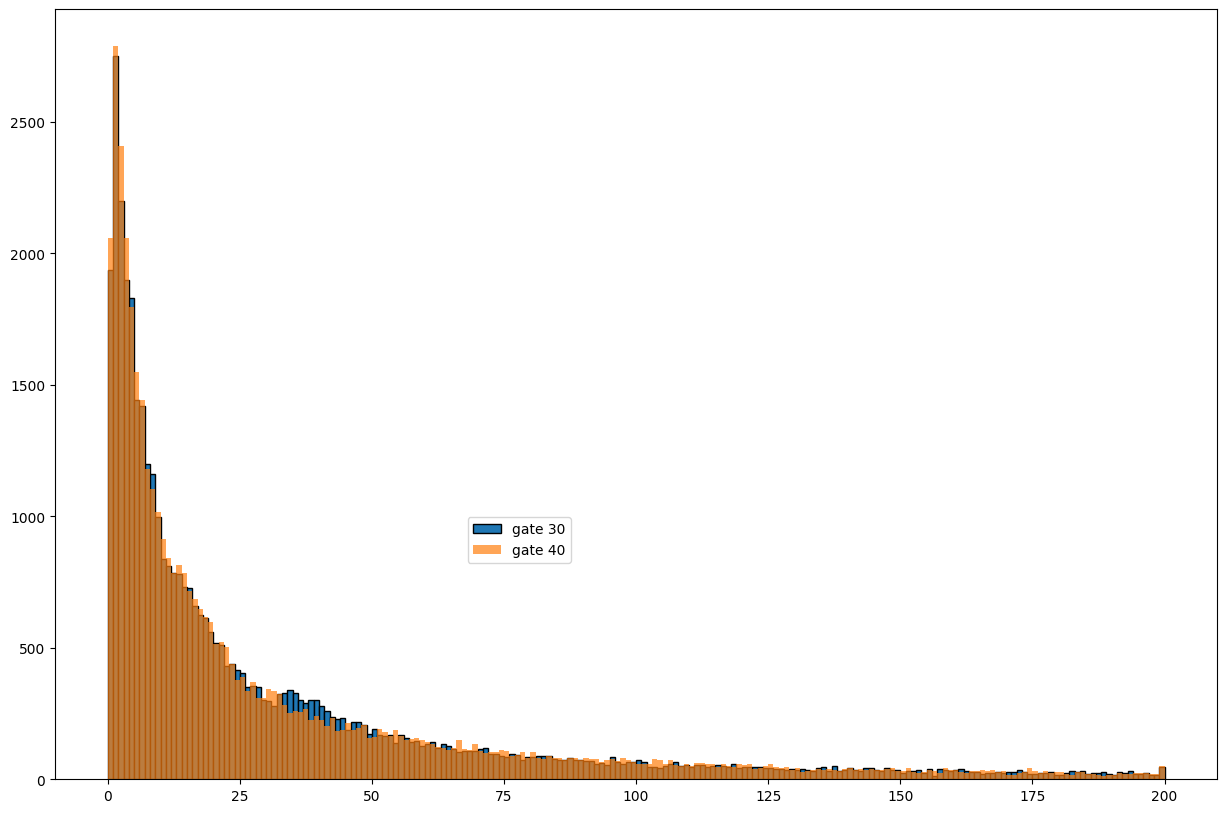

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

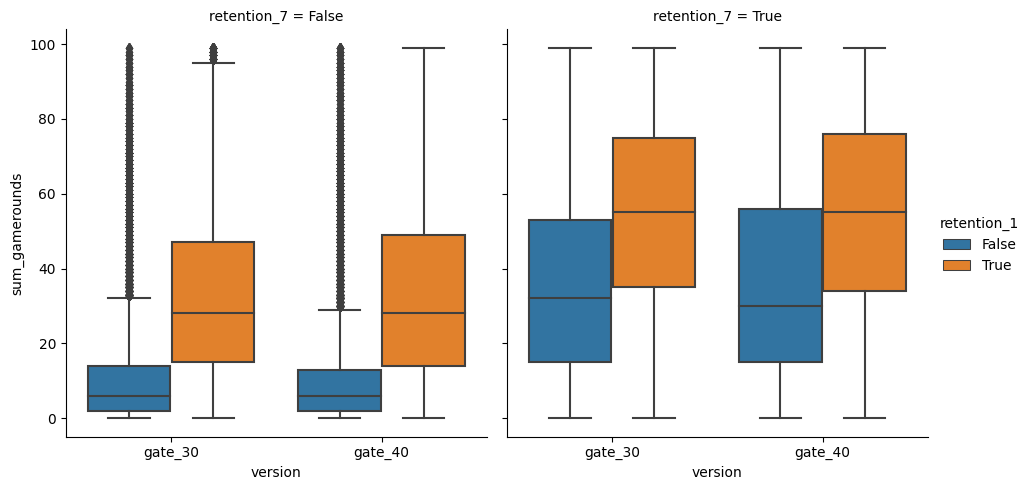

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [ ]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=1024331250.500, p=0.050
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

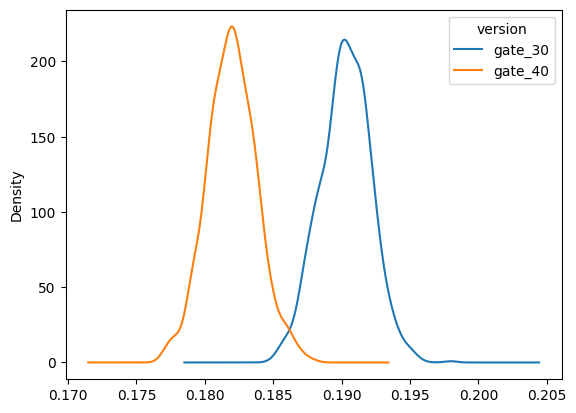

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

Для использования t-теста, необходимо проверить равенство дисперссий  с помощью F-теста. Используем собственную функцию.

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.029, p=0.32437
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


Теперь можно использовать t-критерий Стьюдента!

In [ ]:
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p < 0.05:
    print('Отклоняем нулевую гипотезу, средние, вероятно, не одинаковые')
else:
    print('Принимаем  нулевую гипотезу, средние, вероятно, одинаковые')

Статистика=101.435, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, не одинаковые


Вывод: P близко к нулю, мы отвергаем нулевую гипотезу.Cредние значения двух выборок одинаковые. Cуществует статистически значимая разница между тем где поставить ворота.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [ ]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon

<ipython-input-24-72ec86553d54>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pok_gr1 = pokemon [pokemon['Class 1'] == 'Grass']
pok_gr2 = pokemon [pokemon['Class 2'] == 'Grass']
pok_gr = pd.concat([pok_gr1, pok_gr2])
pok_rock1 = pokemon [pokemon['Class 1'] == 'Rock']
pok_rock2 = pokemon [pokemon['Class 2'] == 'Rock']
pok_rock = pd.concat([pok_rock1,pok_rock2])
pok_rock.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False


In [ ]:
common = pd.merge(pok_gr,pok_rock, on =['Name'], how = 'inner')
common


,pid_x,Name,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,...,pid_y,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y
0,378,Lileep,Rock,Grass,66,41,77,61,87,23,...,378,Rock,Grass,66,41,77,61,87,23,False
1,379,Cradily,Rock,Grass,86,81,97,81,107,43,...,379,Rock,Grass,86,81,97,81,107,43,False


In [ ]:
#Удаление дублиатов
pok_gr = pok_gr.loc[~pok_gr.Name.isin(pok_rock.Name)]
pok_rock = pok_rock.loc[~pok_rock.Name.isin(pok_gr.Name)]

In [ ]:
# Проверка оставшихся дубликатов
common = pd.merge(pok_gr,pok_rock, on =['Name'], how = 'inner')
common

,pid_x,Name,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,...,pid_y,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y


In [ ]:
pok_gr['Attack'].describe()

count     93.000000
mean      73.731183
std       24.179645
min       27.000000
25%       59.000000
50%       70.000000
75%       95.000000
max      132.000000
Name: Attack, dtype: float64

In [ ]:
pok_rock['Attack'].describe()

count     58.000000
mean      90.724138
std       34.857501
min       10.000000
25%       61.000000
50%       90.000000
75%      114.250000
max      165.000000
Name: Attack, dtype: float64

In [ ]:
alpha = 0.05 # уровень доверия
result = ttest_ind(pok_gr.Attack,pok_rock.Attack)
pv = result.pvalue
print('P-value = %8f'% pv)

if pv < alpha:
  print('Отnвергаем гипотезу. Урон разный.')
else:
  print('Принимаем гипотезу. Урон одинаковый.')

P-value = 0.000545
Оnвергаем гипотезу. Урон разный.


Вывод: Урон разный

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pok_water1 = pokemon [pokemon['Class 1'] == 'Water']
pok_water2 = pokemon [pokemon['Class 2'] == 'Water']
pok_water = pd.concat([pok_water1, pok_water2])
pok_norm1 = pokemon [pokemon['Class 1'] == 'Normal']
pok_norm2 = pokemon [pokemon['Class 2'] == 'Normal']
pok_norm = pd.concat([pok_norm1,pok_norm2])
pok_norm.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [ ]:
# Проверка наличия дубликатов
common = pd.merge(pok_water,pok_norm, on =['Name'], how = 'inner')
common

,pid_x,Name,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,...,pid_y,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y
0,446,Bibarel,Normal,Water,79,85,60,55,60,71,...,446,Normal,Water,79,85,60,55,60,71,False


In [ ]:
#Удаление дубликатов
pok_norm = pok_norm.loc[~pok_norm.Name.isin(pok_water.Name)]
pok_water = pok_water.loc[~pok_water.Name.isin(pok_norm.Name)]

common = pd.merge(pok_water,pok_norm, on =['Name'], how = 'inner')
common

,pid_x,Name,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,...,pid_y,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y


In [ ]:
pok_norm.Speed.describe()

count    101.000000
mean      72.257426
std       28.427330
min        5.000000
25%       50.000000
50%       72.000000
75%       93.000000
max      135.000000
Name: Speed, dtype: float64

In [ ]:
pok_water.Speed.describe()

count    126.000000
mean      64.984127
std       22.664151
min       15.000000
25%       50.000000
50%       65.000000
75%       80.750000
max      122.000000
Name: Speed, dtype: float64

In [ ]:
alpha = 0.05 # Уровень доверия

result = ttest_ind(pok_water.Speed,pok_norm.Speed)
pv = result.pvalue
print('P-value = %8f'% pv)

if pv < alpha:
  print('Оnровергаем гипотезу. Скорости разные.')
else:
  print('Принимаем гипотезу. Скорости одинаковые.')

P-value = 0.033018
Оnровергаем гипотезу. Скорости разные.


Вывод: Скорости разные

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [ ]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

df = pd.DataFrame(treathed_pokemon, columns =['Name'])
df

,Name
0,Mega Beedrill
1,Mega Alakazam
2,Deoxys Normal Forme
3,Mega Lopunny


In [ ]:
df_tr_pok = pd.merge(df,pokemon, on ='Name', how = 'inner')
df_tr_pok['Speed'].describe()


count      4.000000
mean     145.000000
std        7.071068
min      135.000000
25%      142.500000
50%      147.500000
75%      150.000000
max      150.000000
Name: Speed, dtype: float64

In [ ]:
df_not_tr = pokemon.loc[~pokemon.Name.isin(df_tr_pok.Name)]
df_not_tr['Speed'].describe()

count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

Вывод: Покемоны treathed_pokemon быстрее

In [ ]:
alpha = 0.05 # Уровень доверия

result = ttest_ind(df_tr_pok['Speed'],df_not_tr['Speed'])
pv = result.pvalue
print('P-value = %8f'% pv)

if pv < alpha:
  print('Оnровергаем гипотезу. Скорости разные.')
else:
  print('Принимаем гипотезу. Скорости одинаковые.')

P-value = 0.000000
Оnровергаем гипотезу. Скорости разные.


**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
df_legend = pokemon[pokemon.Legendary ==True]
df_not_legend = pokemon[pokemon.Legendary ==False]
df_not_legend.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
df_legend['SumPar'] = df_legend['Attack']+df_legend['Defense']+df_legend['HP']
df_not_legend['SumPar'] = df_not_legend['Attack']+df_not_legend['Defense']+df_not_legend['HP']
df_not_legend.head()

<ipython-input-42-3e4e086c59fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_legend['SumPar'] = df_legend['Attack']+df_legend['Defense']+df_legend['HP']
<ipython-input-42-3e4e086c59fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_legend['SumPar'] = df_not_legend['Attack']+df_not_legend['Defense']+df_not_legend['HP']


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,SumPar
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134


In [ ]:
df_legend['SumPar'].describe()

count     65.000000
mean     309.076923
std       46.429822
min      230.000000
25%      275.000000
50%      305.000000
75%      340.000000
max      440.000000
Name: SumPar, dtype: float64

In [ ]:
df_not_legend['SumPar'].describe()

count    735.000000
mean     214.410884
std       64.359599
min       55.000000
25%      165.000000
50%      213.000000
75%      258.000000
max      440.000000
Name: SumPar, dtype: float64

<Axes: >

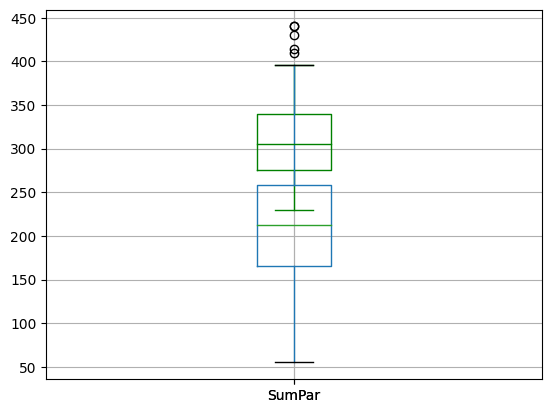

In [ ]:
df_legend.boxplot(column = 'SumPar', color = 'green')
df_not_legend.boxplot(column = 'SumPar')

In [ ]:
alpha = 0.05 # уровень доверия
result = ttest_ind(df_legend.SumPar,df_not_legend.SumPar)
pv = result.pvalue
print('P-value = %8f'% pv)

if pv < alpha:
  print('Оnвергаем гипотезу. Сумма параметров легендарных покемонов отличается от обычных.')
else:
  print('Принимаем гипотезу. Сумма параметров у  легендарных и обычных покемеонов одинаковы.')

P-value = 0.000000
Оnвергаем гипотезу. Сумма параметров легендарных покемонов отличается от обычных.


Вывод: Видно, что в среднем легендарыне покемоны сильнее, хотя некоторые легендарные покемоны слабее.

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [ ]:
pokemon_t = pokemon
pokemon_t.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False


In [ ]:
pokemon_t['sum_cl']= pokemon['Class 1'] +' '+ pokemon['Class 2']
pokemon_t

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_cl
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,Grass Poison
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,Grass Poison
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,Grass Poison
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,Grass Poison
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,Rock Fairy
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,Rock Fairy
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,Psychic Ghost
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,Psychic Dark


In [ ]:
# Составление датафрейма с дубликатами
eq_arr = []
eq_df = pd.DataFrame()

eq_arr = []

for cl1 in best_defence_class:
  for cl2 in best_defence_class:
    dat = cl1+ ' '+cl2
    eq_arr.append(dat)

eq_df['sum_cl'] = eq_arr
eq_df

,sum_cl
0,Rock Rock
1,Rock Ground
2,Rock Steel
3,Rock Ice
4,Ground Rock
5,Ground Ground
6,Ground Steel
7,Ground Ice
8,Steel Rock
9,Steel Ground


In [ ]:
# Полчение датафрейма с перекрестными классами.
common = pd.merge(eq_df,pokemon, on =['sum_cl'], how = 'inner')


In [ ]:
common

,sum_cl,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Rock Ground,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
1,Rock Ground,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
2,Rock Ground,83,Golem,Rock,Ground,80,120,130,55,65,45,False
3,Rock Ground,104,Onix,Rock,Ground,35,45,160,30,45,70,False
4,Rock Ground,266,Larvitar,Rock,Ground,50,64,50,45,50,41,False
5,Rock Ground,267,Pupitar,Rock,Ground,70,84,70,65,70,51,False
6,Rock Steel,456,Shieldon,Rock,Steel,30,42,118,42,88,30,False
7,Rock Steel,457,Bastiodon,Rock,Steel,60,52,168,47,138,30,False
8,Rock Steel,529,Probopass,Rock,Steel,60,55,145,75,150,40,False
9,Rock Ice,769,Amaura,Rock,Ice,77,59,50,67,63,46,False


In [ ]:
#Удаление дубликатов
pokemon_t = pokemon_t.loc[~pokemon_t.Name.isin(common.Name)]
pokemon_t
# Количество строк уменьшилось

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_cl
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,Grass Poison
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,Grass Poison
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,Grass Poison
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,Grass Poison
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,Rock Fairy
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,Rock Fairy
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,Psychic Ghost
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,Psychic Dark


In [ ]:
pokemon_t.pop('sum_cl')
pokemon_t

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [ ]:
def appender (cl_name):
  df= pokemon_t[pokemon_t['Class 1'] == cl_name]
  df= df.append(pokemon_t[pokemon_t['Class 2'] == cl_name], ignore_index = True)
  return df

In [ ]:
rock = appender('Rock')
ground = appender('Ground')
steel = appender('Steel')
ice = appender('Ice')

<ipython-input-57-340fc3ddc9c9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(pokemon_t[pokemon_t['Class 2'] == cl_name], ignore_index = True)


In [ ]:
def_df =pd.DataFrame()
def_df['Rock'] = rock['Defense']
def_df['Ground'] = ground['Defense']
def_df['Steel'] = steel['Defense']
def_df['Ice'] = ice['Defense']
def_df.head(1)

,Rock,Ground,Steel,Ice
0,100,85,140.0,35.0


In [ ]:
def_df.describe()

,Rock,Ground,Steel,Ice
count,41.000000,41.000000,40.000000,33.000000
mean,104.097561,80.243902,109.325000,78.515152
std,38.226826,30.593121,32.157774,35.804261
min,40.000000,25.000000,50.000000,15.000000
25%,85.000000,50.000000,90.250000,50.000000
50%,100.000000,80.000000,100.000000,80.000000
75%,125.000000,100.000000,129.250000,90.000000
max,230.000000,160.000000,230.000000,184.000000


In [ ]:
def_df['Steel'] = def_df['Steel'].fillna(def_df['Steel'].mean())
def_df['Ice'] = def_df['Ice'].fillna(def_df['Ice'].mean())


{'whiskers': [<matplotlib.lines.Line2D at 0x7e40a0dde410>,
 'caps': [<matplotlib.lines.Line2D at 0x7e40a0dde9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e40a0dddb70>,
 'medians': [<matplotlib.lines.Line2D at 0x7e40a0dde140>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e40a09fc190>,
 'means': []}

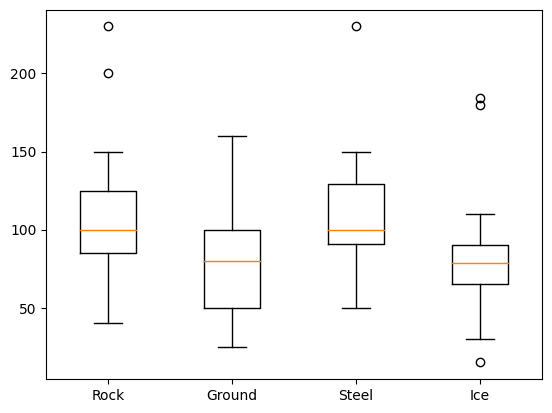

In [ ]:
plt.boxplot(def_df, labels = best_defence_class)

Сатистически и графически средние различаются. Похожи между собой Rock и Steel, Ground и Ice.

In [ ]:
# Проверка дисперсионным анализом
fvalue, pvalue = stats.f_oneway(def_df['Rock'], def_df['Ground'],def_df['Steel'],def_df['Ice'], )

print('Fval=%.3f, Pvalue =%.6f ' %(fvalue, pvalue))

if pvalue < 0.05:
  print('Нулевая гипотеза не подтверждается. Средние разные')
else:
  print ('Нулевая гипотеза не подтверждается. Средние одинаковые')

Fval=9.403, Pvalue =0.000009 
Нулевая гипотеза не подтверждается. Средние разные


Анализ так же показывает, что средние разные.